In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
tickerSymbol = 'XLRE'
data = yf.Ticker(tickerSymbol)

prices_1 = data.history(start='2021-01-01', end='2022-01-03').Close
returns_1 = prices_1.pct_change().dropna()

prices_3 = data.history(start='2019-01-01', end='2022-01-03').Close
returns_3 = prices_3.pct_change().dropna()

prices_5 = data.history(start='2017-01-01', end='2022-01-03').Close
returns_5 = prices_5.pct_change().dropna()

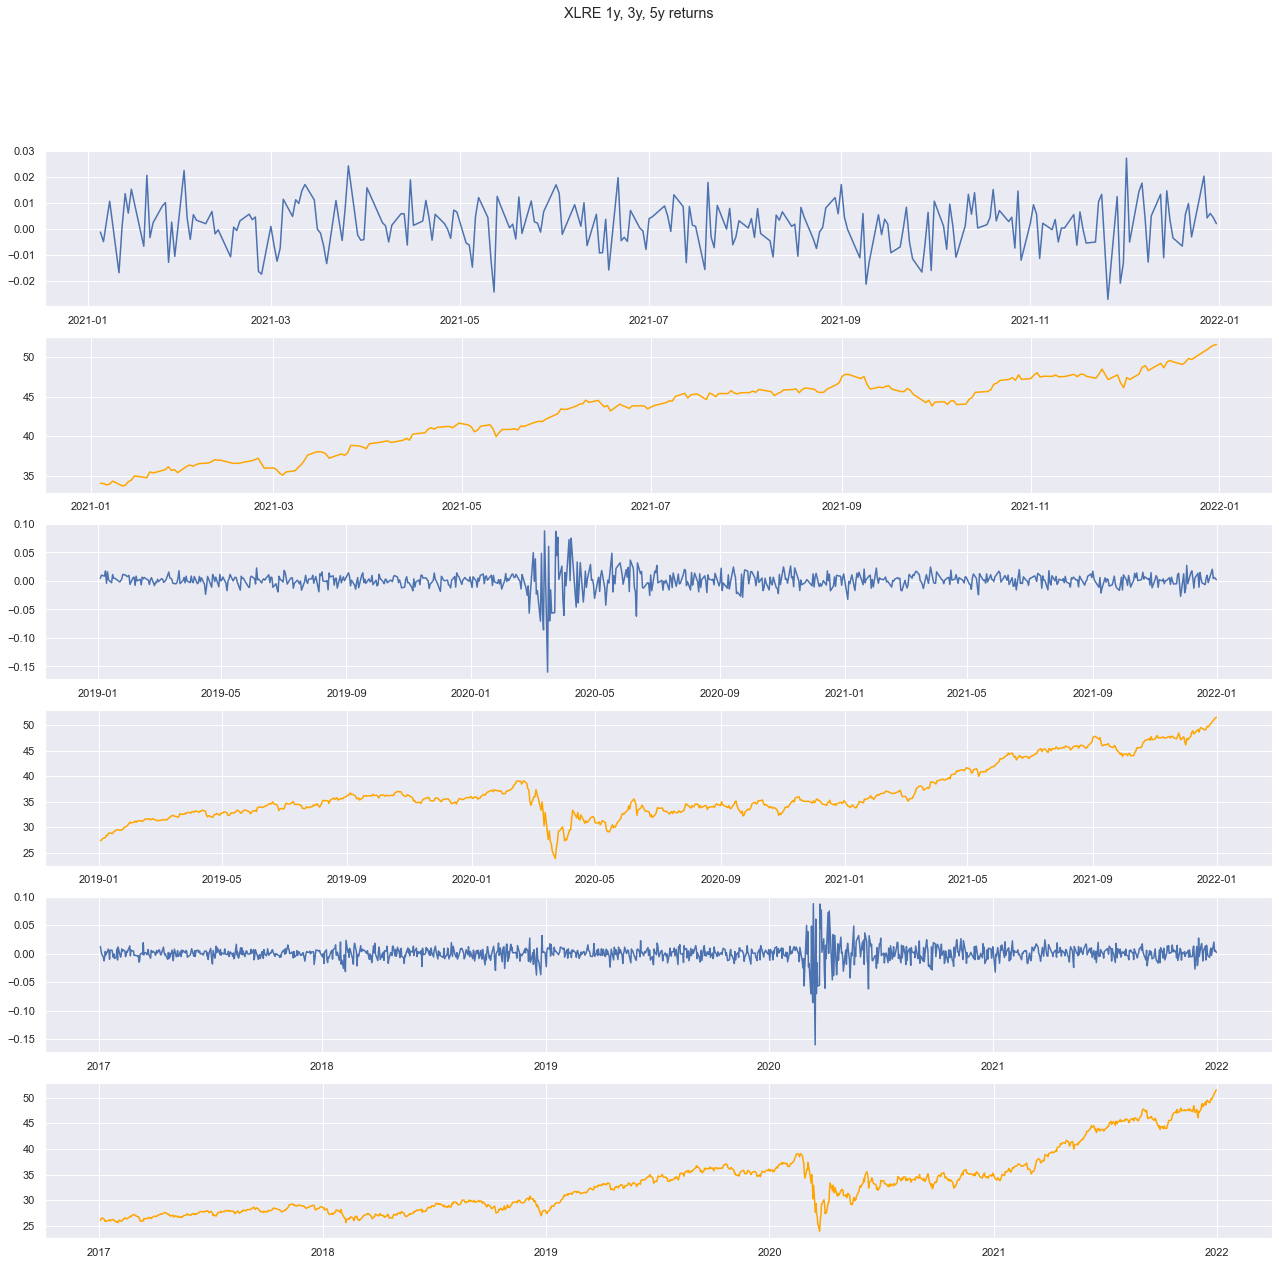

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(22,20)})
fig, axs = plt.subplots(6)
fig.suptitle(f'{tickerSymbol} 1y, 3y, 5y returns')
axs[0].plot(returns_1, label='1y Returns')
axs[1].plot(prices_1, label='1y Price', color='orange')

axs[2].plot(returns_3, label='3y Returns')
axs[3].plot(prices_3, label='3y Price', color='orange')

axs[4].plot(returns_5, label='5y Returns')
axs[5].plot(prices_5, label='1y Price', color='orange')


In [4]:
print(returns_1.head())
print(returns_3.head())
print(returns_5.head())

Date
2021-01-05   -0.001131
2021-01-06   -0.004810
2021-01-07    0.003128
2021-01-08    0.010771
2021-01-11   -0.016826
Name: Close, dtype: float64
Date
2019-01-03    0.004622
2019-01-04    0.010187
2019-01-07    0.008458
2019-01-08    0.017420
2019-01-09   -0.004122
Name: Close, dtype: float64
Date
2017-01-04    0.012642
2017-01-05    0.005122
2017-01-06    0.000000
2017-01-09   -0.006369
2017-01-10   -0.012500
Name: Close, dtype: float64


In [5]:
import statistics
from scipy.stats import jarque_bera

print(f'One year descriptive statistics for {tickerSymbol}\n')

print(f'{tickerSymbol} mean = {statistics.mean(returns_1)}')
print(f'{tickerSymbol} variance = {statistics.variance(returns_1)}')
print(f'{tickerSymbol} std_dev = {statistics.stdev(returns_1)}')
print(f'{tickerSymbol} skewness = {returns_1.kurtosis()}')
print(f'{tickerSymbol} kurtosis = {returns_1.skew()}')
print(f'{tickerSymbol} {jarque_bera(returns_1)}')
print('\n')
print(f'Three year descriptive statistics for {tickerSymbol}\n')

print(f'{tickerSymbol} mean = {statistics.mean(returns_3)}')
print(f'{tickerSymbol} variance = {statistics.variance(returns_3)}')
print(f'{tickerSymbol} std_dev = {statistics.stdev(returns_3)}')
print(f'{tickerSymbol} skewness = {returns_3.kurtosis()}')
print(f'{tickerSymbol} kurtosis = {returns_3.skew()}')
print(f'{tickerSymbol} {jarque_bera(returns_3)}')
print('\n')
print(f'Five year descriptive statistics for {tickerSymbol}\n')

print(f'{tickerSymbol} mean = {statistics.mean(returns_5)}')
print(f'{tickerSymbol} variance = {statistics.variance(returns_5)}')
print(f'{tickerSymbol} std_dev = {statistics.stdev(returns_5)}')
print(f'{tickerSymbol} skewness = {returns_5.kurtosis()}')
print(f'{tickerSymbol} kurtosis = {returns_5.skew()}')
print(f'{tickerSymbol} {jarque_bera(returns_5)}')

One year descriptive statistics for XLRE

XLRE mean = 0.0016834786749597146
XLRE variance = 8.225619541821425e-05
XLRE std_dev = 0.009069520131639504
XLRE skewness = 0.28392733050518126
XLRE kurtosis = -0.21307214756649623
XLRE Jarque_beraResult(statistic=2.5539062758082456, pvalue=0.2788857336382815)


Three year descriptive statistics for XLRE

XLRE mean = 0.0009688930511242997
XLRE variance = 0.00026060564429354643
XLRE std_dev = 0.016143284804944327
XLRE skewness = 19.321897508521612
XLRE kurtosis = -1.1898295296613064
XLRE Jarque_beraResult(statistic=11773.406467817334, pvalue=0.0)


Five year descriptive statistics for XLRE

XLRE mean = 0.0006369876532494818
XLRE variance = 0.00018495206850265632
XLRE std_dev = 0.013599708397706781
XLRE skewness = 23.748447399193925
XLRE kurtosis = -1.200290463788966
XLRE Jarque_beraResult(statistic=29617.67206225486, pvalue=0.0)


In [6]:
import math
# round down to nearest int
test_size_1 = math.floor(len(returns_1)*0.40)
test_size_3 = math.floor(len(returns_3)*0.40)
test_size_5 = math.floor(len(returns_5)*0.40)

In [7]:
# doing 60:40 train-test split
print(f'The number of observations in the 1y test set is {test_size_1}')
print(f'The number of observations in the 1y training set is {len(returns_1)*0.60}\n')

print(f'The number of observations in the 3y test set is {test_size_3}')
print(f'The number of observations in the 3y training set is {len(returns_3)*0.60}\n')

print(f'The number of observations in the 5y test set is {test_size_5}')
print(f'The number of observations in the 5y training set is {len(returns_5)*0.60}\n')

The number of observations in the 1y test set is 100
The number of observations in the 1y training set is 150.6

The number of observations in the 3y test set is 302
The number of observations in the 3y training set is 453.59999999999997

The number of observations in the 5y test set is 503
The number of observations in the 5y training set is 754.8



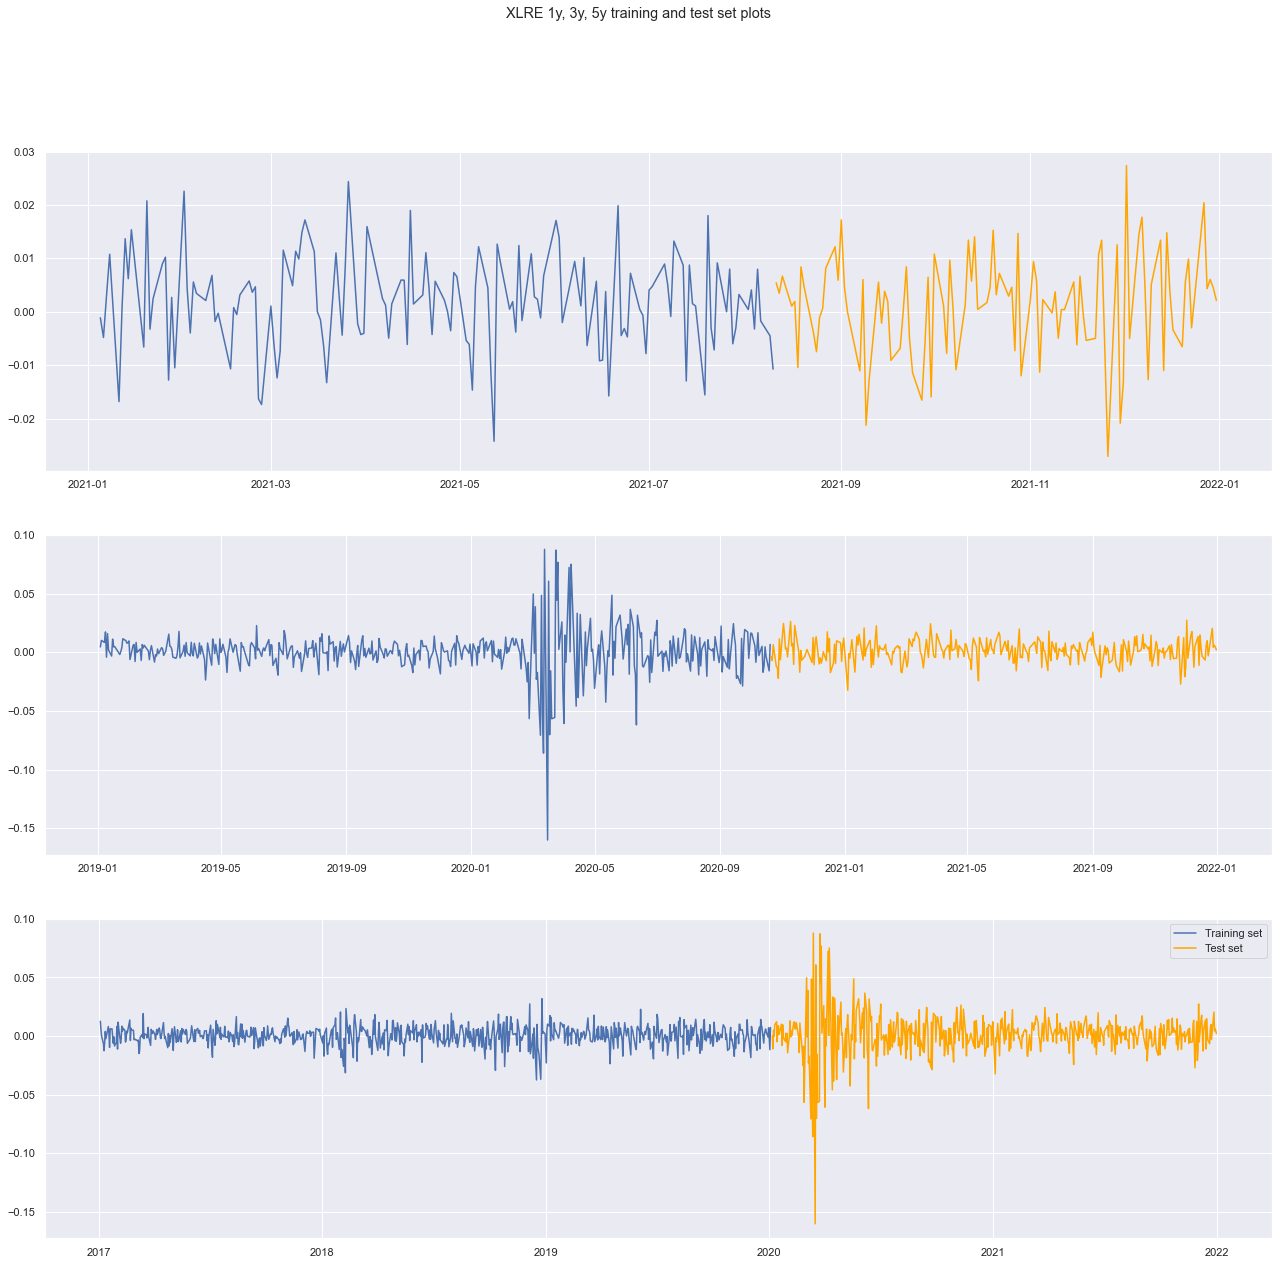

In [8]:
df_train_1 = returns_1[:-test_size_1]
df_test_1 = returns_1[-test_size_1:]

df_train_3 = returns_3[:-test_size_3]
df_test_3 = returns_3[-test_size_3:]

df_train_5 = returns_5[:-test_size_5]
df_test_5 = returns_5[-test_size_5:]

fig, axs = plt.subplots(3)
fig.suptitle(f'{tickerSymbol} 1y, 3y, 5y training and test set plots')
axs[0].plot(df_train_1, label='Training set')
axs[0].plot(df_test_1, label='Test set', color='orange')

axs[1].plot(df_train_3, label='Training set')
axs[1].plot(df_test_3, label='Test set', color='orange')

axs[2].plot(df_train_5, label='Training set')
axs[2].plot(df_test_5, label='Test set', color='orange')

plt.legend();

In [9]:
print(f'Lagged dataframes for {tickerSymbol}')

# Split series into train and test sets
series_1 = returns_1.squeeze()
series_3 = returns_3.squeeze()
series_5 = returns_5.squeeze()

# Create a lag feature
var_1 = pd.DataFrame(series_1.values)
dataframe_1 = pd.concat([var_1.shift(1), var_1], axis=1)
dataframe_1.columns = ['t', 't+1']

var_3 = pd.DataFrame(series_3.values)
dataframe_3 = pd.concat([var_3.shift(1), var_3], axis=1)
dataframe_3.columns = ['t', 't+1']

var_5 = pd.DataFrame(series_5.values)
dataframe_5 = pd.concat([var_5.shift(1), var_5], axis=1)
dataframe_5.columns = ['t', 't+1']

# show dfs to verify
print(dataframe_1.head(5))
print(dataframe_3.head(5))
print(dataframe_5.head(5))

Lagged dataframes for XLRE
          t       t+1
0       NaN -0.001131
1 -0.001131 -0.004810
2 -0.004810  0.003128
3  0.003128  0.010771
4  0.010771 -0.016826
          t       t+1
0       NaN  0.004622
1  0.004622  0.010187
2  0.010187  0.008458
3  0.008458  0.017420
4  0.017420 -0.004122
          t       t+1
0       NaN  0.012642
1  0.012642  0.005122
2  0.005122  0.000000
3  0.000000 -0.006369
4 -0.006369 -0.012500


In [10]:
X1 = dataframe_1.values
train_size_1 = int(len(X1) * 0.6)

X3 = dataframe_3.values
train_size_3 = int(len(X3) * 0.6)

X5 = dataframe_5.values
train_size_5 = int(len(X5) * 0.6)

In [11]:
print(f'{train_size_1}')
print(f'{train_size_3}')
print(f'{train_size_5}')

150
453
754


In [12]:
# creating training and test sets for naive baseline 

train_1, test_1 = X1[1:train_size_1], X1[train_size_1:]
train_3, test_3 = X3[1:train_size_3], X3[train_size_3:]
train_5, test_5 = X5[1:train_size_5], X5[train_size_5:]

In [13]:
#
train_X1, train_y1 = train_1[:,0], train_1[:,1]
train_X3, train_y3 = train_3[:,0], train_3[:,1]
train_X5, train_y5 = train_5[:,0], train_5[:,1]

In [14]:
test_X1, test_y1 = test_1[:,0], test_1[:,1]
test_X3, test_y3 = test_3[:,0], test_3[:,1]
test_X5, test_y5 = test_5[:,0], test_5[:,1]

In [15]:
len(test_X5)

504

In [16]:
len(test_y1)

101

In [17]:
# Create a baseline model (Naive model)
def model_persistence(x):
  return x

In [18]:
# generating prediction series
predicted_1 = list()
predicted_3 = list()
predicted_5 = list()

for x in test_X1:
    yhat_1 = model_persistence(x)
    predicted_1.append(yhat_1)

for x in test_X3:
    yhat_3 = model_persistence(x)
    predicted_3.append(yhat_3)

for x in test_X5:
    yhat_5 = model_persistence(x)
    predicted_5.append(yhat_5)


In [23]:
# verifying proper array sizes
print(len(test_y1))
print(len(predicted_1))

101
101


In [20]:
# generating RMSE for 3 periods comparing test set to naive predictions

from sklearn.metrics import mean_squared_error
rmse_1 = np.sqrt(mean_squared_error(test_y1, predicted_1))
rmse_3 = np.sqrt(mean_squared_error(test_y3, predicted_3))
rmse_5 = np.sqrt(mean_squared_error(test_y5, predicted_5))

print(f'{tickerSymbol} 1y Test RMSE: %.3f' % rmse_1)
print(f'{tickerSymbol} 3y Test RMSE: %.3f' % rmse_3)
print(f'{tickerSymbol} 5y Test RMSE: %.3f' % rmse_5)

XLRE 1y Test RMSE: 0.014
XLRE 3y Test RMSE: 0.014
XLRE 5y Test RMSE: 0.029


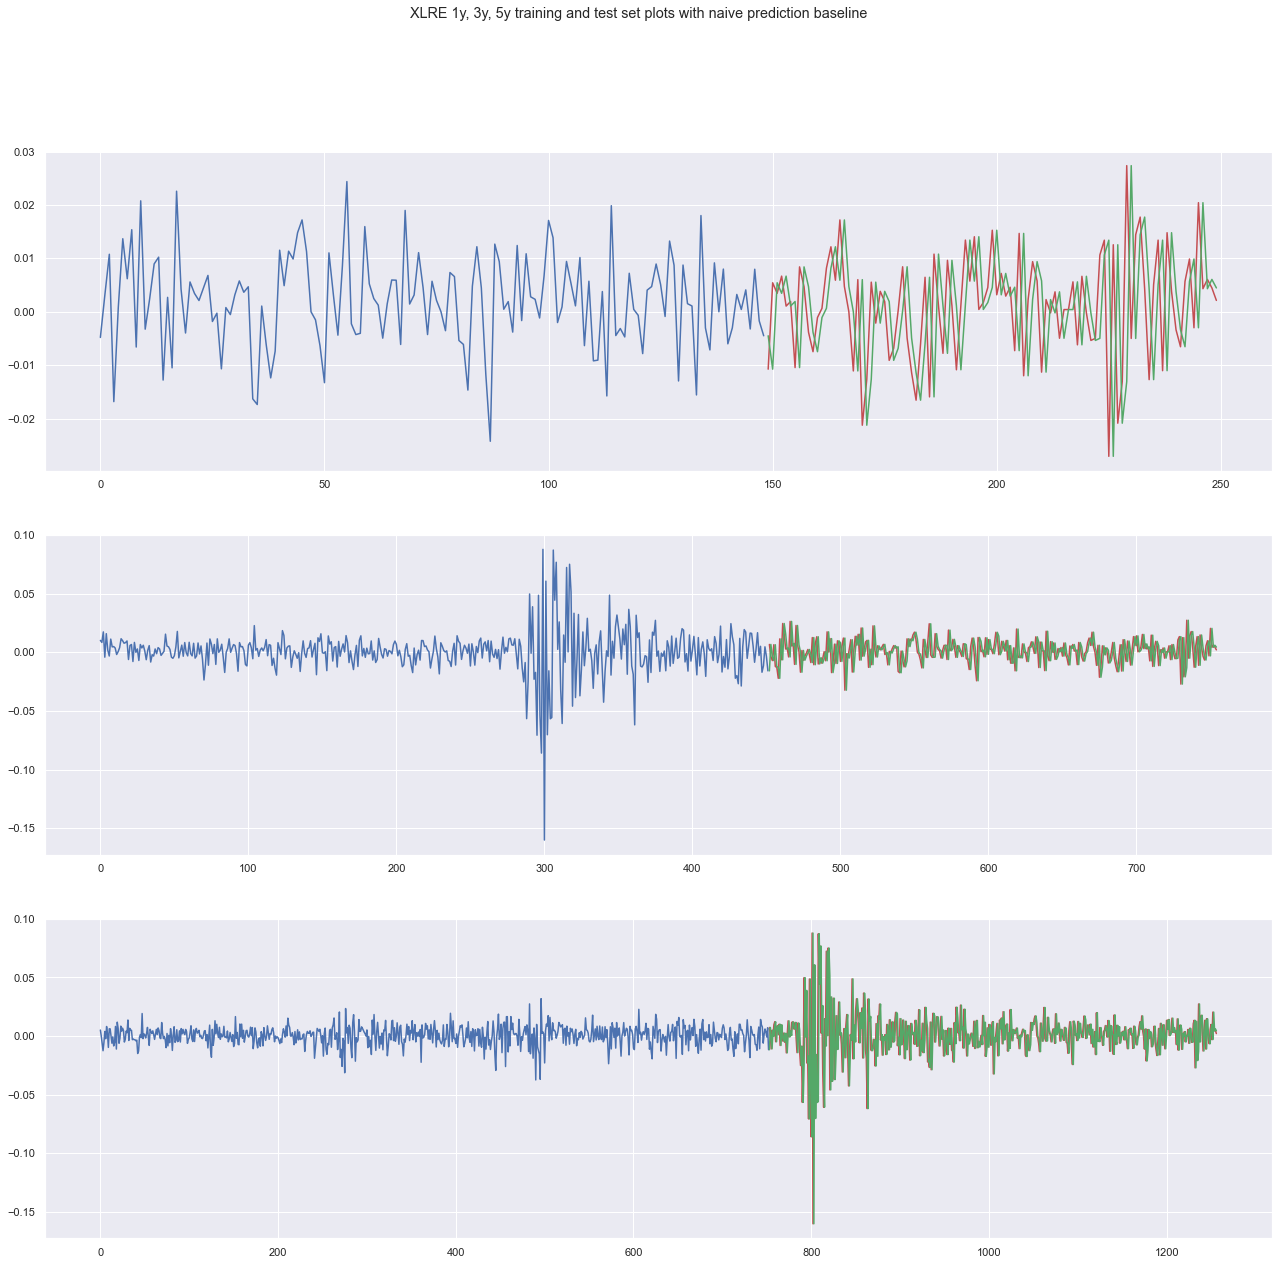

In [21]:
from matplotlib import pyplot as plt

%matplotlib inline
# Plot predictions and expected results
sns.set(rc={'figure.figsize':(22,20)})
fig, axs = plt.subplots(3)
fig.suptitle(f'{tickerSymbol} 1y, 3y, 5y training and test set plots with naive prediction baseline')
axs[0].plot(train_y1, label='train_y')
axs[0].plot([None for i in train_y1] + [x for x in test_y1], color='r')
axs[0].plot([None for i in train_y1] + [x for x in predicted_1], color='g')

axs[1].plot(train_y3, label='train_y3')
axs[1].plot([None for i in train_y3] + [x for x in test_y3], color='r')
axs[1].plot([None for i in train_y3] + [x for x in predicted_3], color='g')

axs[2].plot(train_y5, label='train_y5')
axs[2].plot([None for i in train_y5] + [x for x in test_y5], color='r')
axs[2].plot([None for i in train_y5] + [x for x in predicted_5], color='g')




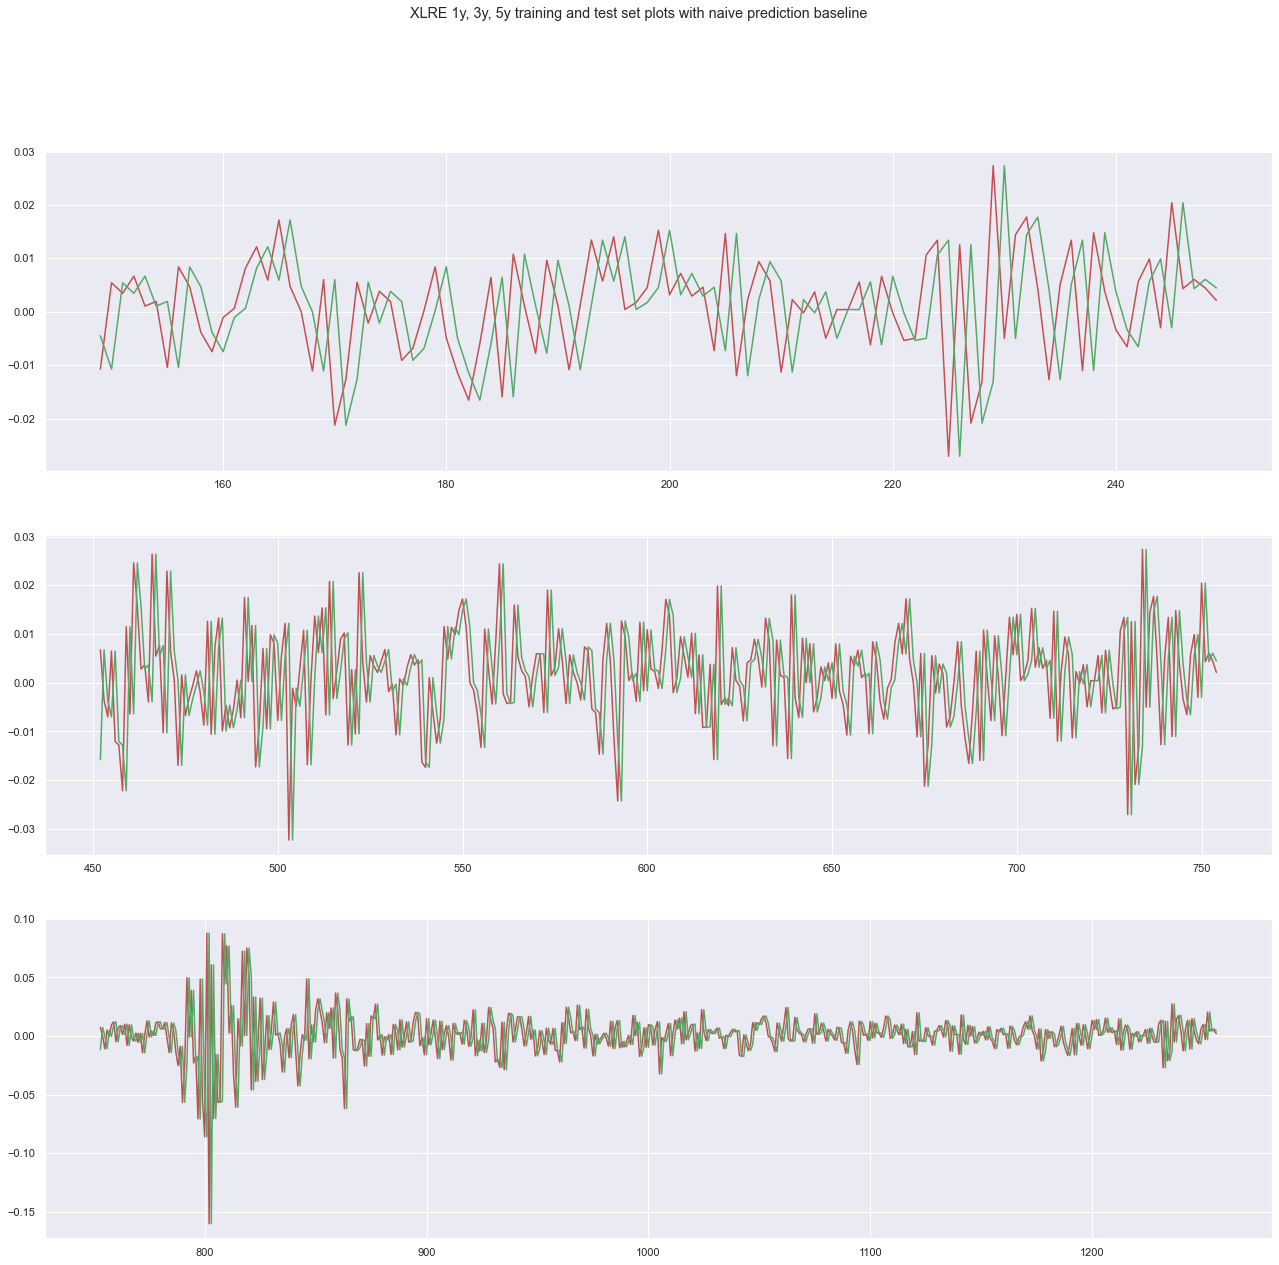

In [22]:
# visualizing test vs. naive 
fig, axs = plt.subplots(3)
fig.suptitle(f'{tickerSymbol} 1y, 3y, 5y training and test set plots with naive prediction baseline')

axs[0].plot([None for i in train_y1] + [x for x in test_y1], color='r')
axs[0].plot([None for i in train_y1] + [x for x in predicted_1], color='g')

axs[1].plot([None for i in train_y3] + [x for x in test_y3], color='r')
axs[1].plot([None for i in train_y3] + [x for x in predicted_3], color='g')


axs[2].plot([None for i in train_y5] + [x for x in test_y5], color='r')
axs[2].plot([None for i in train_y5] + [x for x in predicted_5], color='g')

